In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

### Q1.1 Read the data and do exploratory data analysis. Describe the data briefly.

In [6]:
df=pd.read_csv("bank_marketing_part1_Data.csv")

In [8]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [10]:
df.shape

(210, 7)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [14]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [11]:
#Checking missing values
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [16]:
#Checking duplicate data
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping


**Finding Outliers**

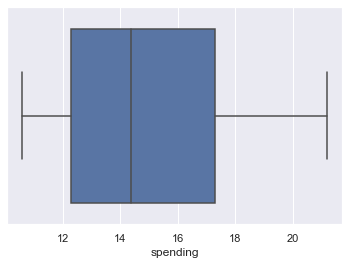

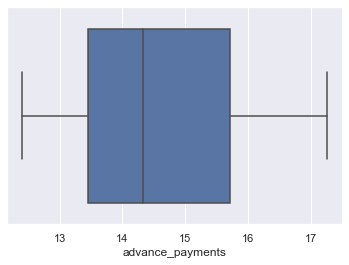

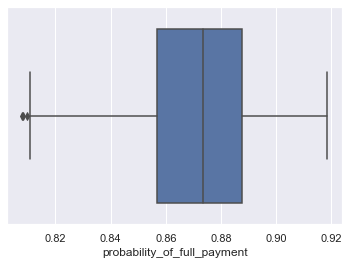

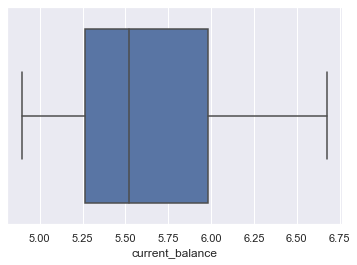

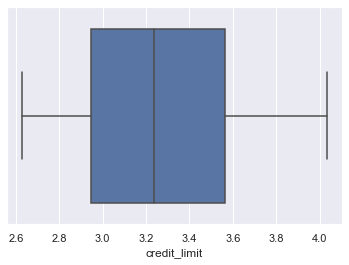

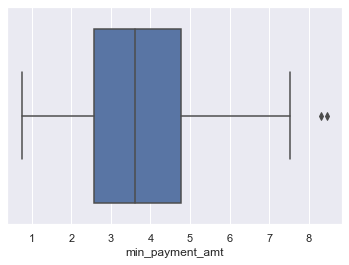

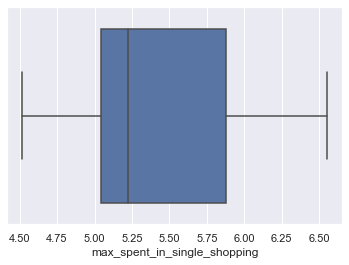

In [18]:
sns.boxplot(x='spending', data=df)
plt.show()
sns.boxplot(x='advance_payments', data=df)
plt.show()
sns.boxplot(x='probability_of_full_payment', data=df)
plt.show()
sns.boxplot(x='current_balance', data=df)
plt.show()
sns.boxplot(x='credit_limit', data=df)
plt.show()
sns.boxplot(x='min_payment_amt', data=df)
plt.show()
sns.boxplot(x='max_spent_in_single_shopping', data=df)
plt.show()

Observations:

By looking at the graphs, we can see that the outliers are found only in the columns:
- probability_of_full_payment
- min_payment_amt

**Outlier Treatment**

In [19]:
#capping technique
def remove_out(xyz):
    sorted(xyz)
    Q1,Q3 = xyz.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range, upper_range

In [21]:
lrfullpayment,urfullpayment = remove_out(df['probability_of_full_payment'])
df['probability_of_full_payment'] = np.where(df['probability_of_full_payment'] > urfullpayment,urfullpayment,df['probability_of_full_payment'])
df['probability_of_full_payment'] = np.where(df['probability_of_full_payment'] < lrfullpayment,lrfullpayment,df['probability_of_full_payment'])

In [23]:
lrminpayment,urminpayment = remove_out(df['min_payment_amt'])
df['min_payment_amt'] = np.where(df['min_payment_amt'] > urminpayment,urminpayment,df['min_payment_amt'])
df['min_payment_amt'] = np.where(df['min_payment_amt'] < lrminpayment,lrminpayment,df['min_payment_amt'])

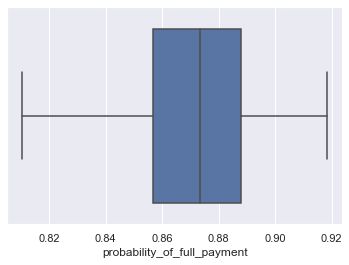

In [24]:
sns.boxplot(x='probability_of_full_payment', data=df)
plt.show()

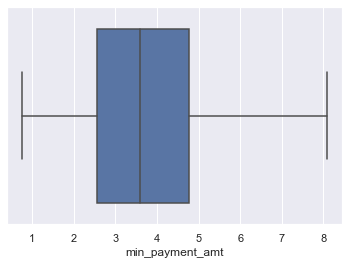

In [25]:
sns.boxplot(x='min_payment_amt', data=df)
plt.show()

**Univariate Analysis**

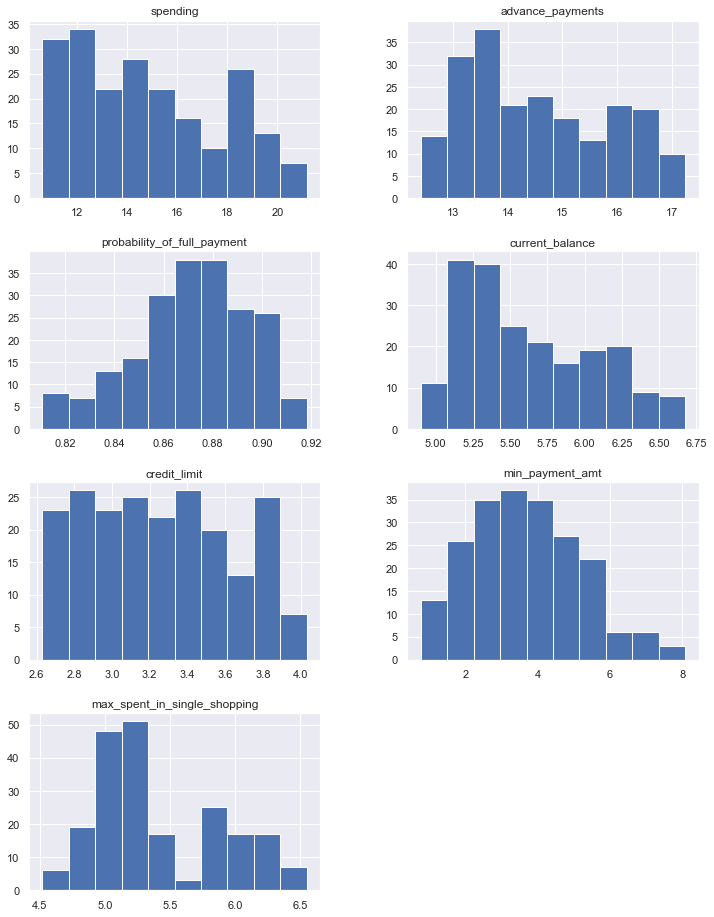

In [27]:
#Plotting distributions of independent attributes

df.hist(figsize=(12,16),layout=(4,2));

**Multivariate analysis**

<function matplotlib.pyplot.show(close=None, block=None)>

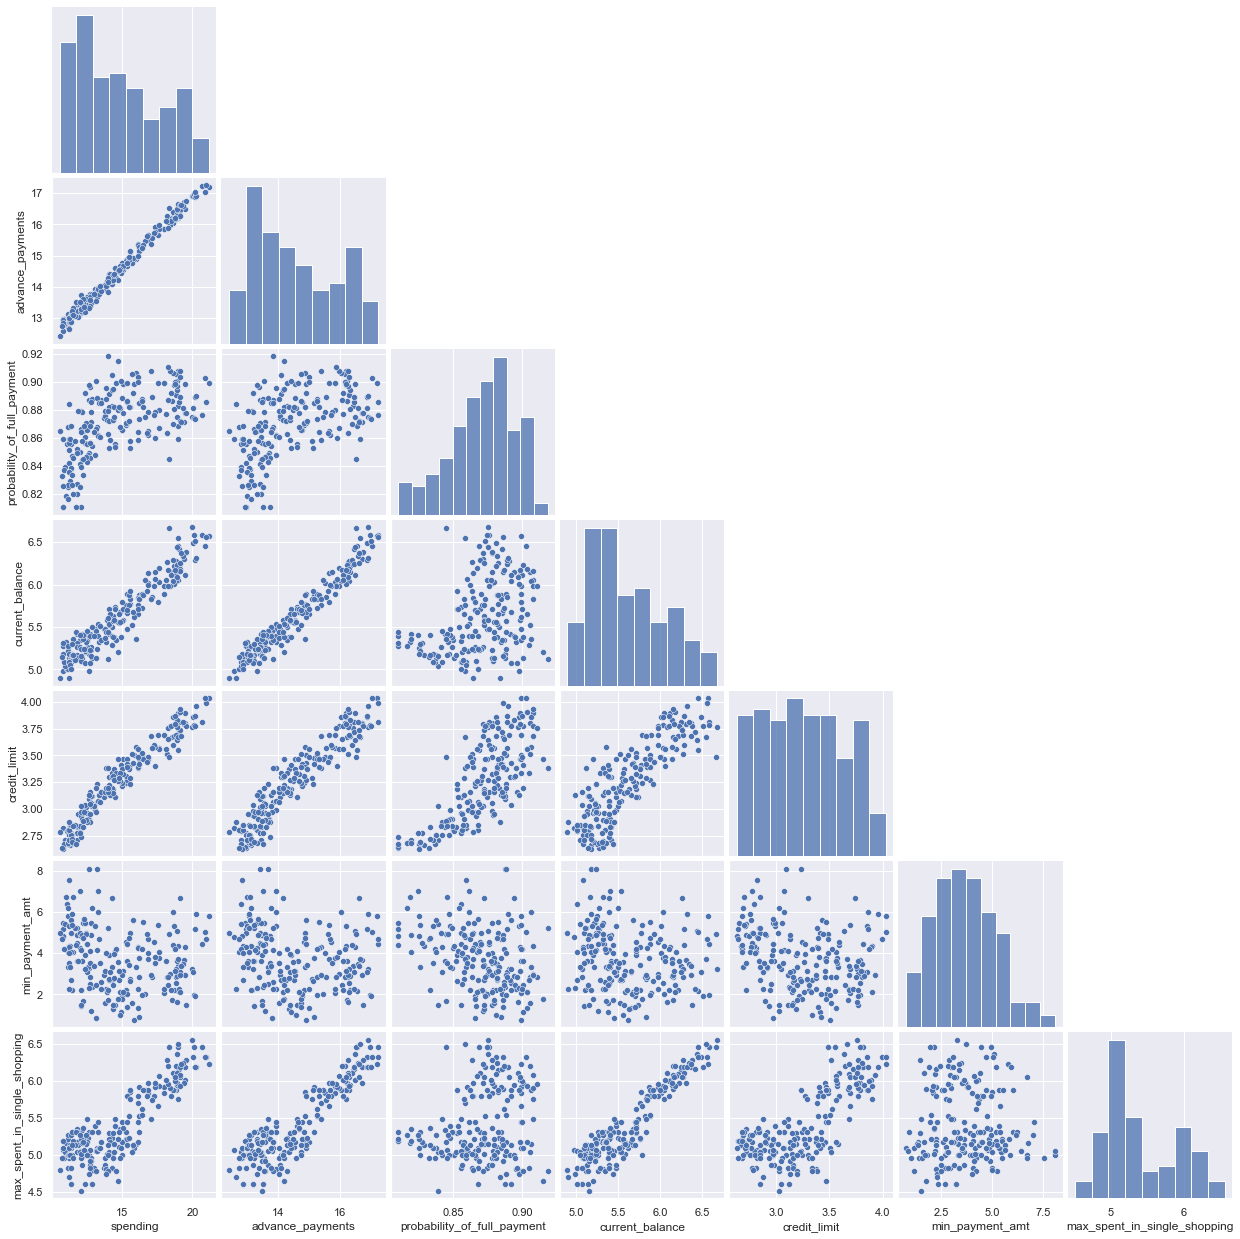

In [29]:
sns.pairplot(df,corner=True)
plt.show

**Checking Correlation**

In [31]:
df.corr().T

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608900,0.949985,0.970771,-0.229619,0.863693
advance_payments,0.994341,1.000000,0.529925,0.972422,0.944829,-0.217051,0.890784
probability_of_full_payment,0.608900,0.529925,1.000000,0.368419,0.762218,-0.335071,0.227140
current_balance,0.949985,0.972422,0.368419,1.000000,0.860415,-0.170701,0.932806
credit_limit,0.970771,0.944829,0.762218,0.860415,1.000000,-0.258980,0.749131
min_payment_amt,-0.229619,-0.217051,-0.335071,-0.170701,-0.258980,1.000000,-0.009605
max_spent_in_single_shopping,0.863693,0.890784,0.227140,0.932806,0.749131,-0.009605,1.000000


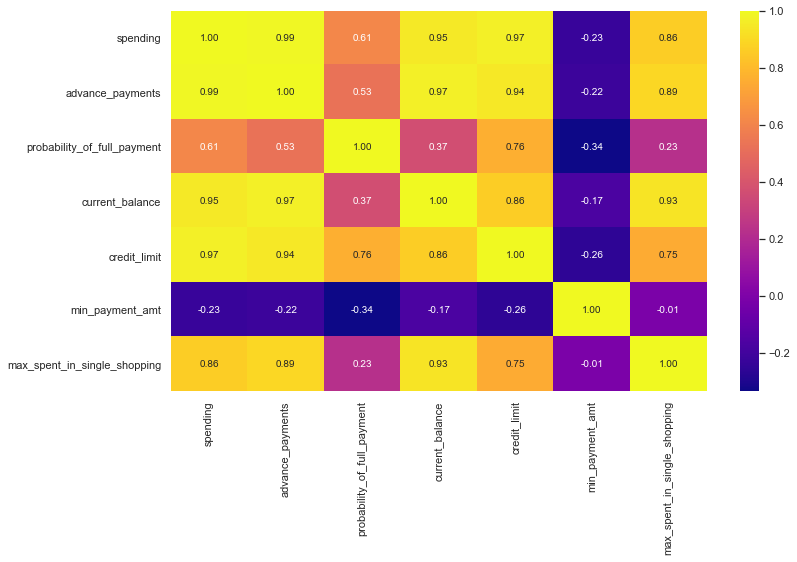

In [30]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,fmt = '.2f',cmap='plasma')
plt.show()

### Q1.2  Do you think scaling is necessary for clustering in this case? Justify

- Scaling needs to be done as the values of the variables are different.
- spending, advance_payments are in different values and this may get more weightage.
- Also have shown below the plot of the data prior and after scaling.
- Scaling will have all the values in the relative same range.
- I have used zscore to standarised the data to relative same scale -3 to +3.

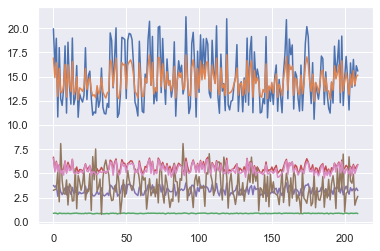

In [32]:
plt.plot(df)
plt.show()

In [34]:
#Attributes are being scaled
from scipy.stats import zscore
df_scaled=df.apply(zscore)

In [35]:
df_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


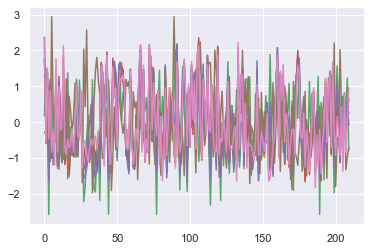

In [36]:
plt.plot(df_scaled)
plt.show()

### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

Method Used: Linkage

In [38]:
hc = linkage(df_scaled, method = 'average')

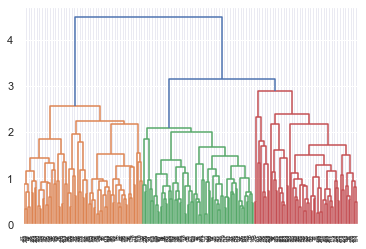

In [47]:
dend = dendrogram(hc)

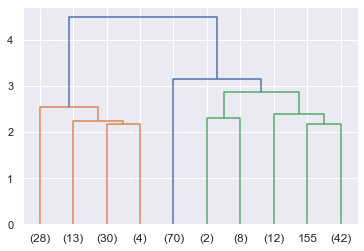

In [48]:
dend = dendrogram(hc,
                 truncate_mode='lastp',
                 p = 10,
                 )

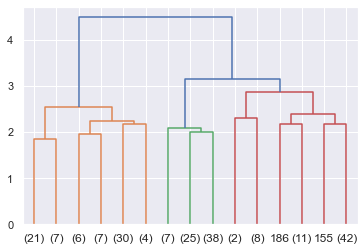

In [50]:
dend = dendrogram(hc,
                 truncate_mode='lastp',
                 p = 15)

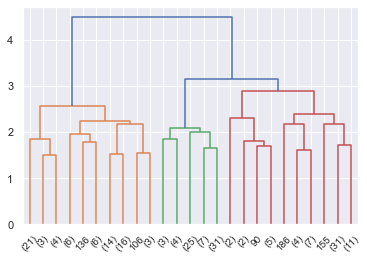

In [51]:
dend = dendrogram(hc,
                 truncate_mode='lastp',
                 p = 25)

In [53]:
from scipy.cluster.hierarchy import fcluster

In [58]:
clusters1 = fcluster(hc, 3, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [59]:
clusters2 = fcluster(hc, 23, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [60]:
df['clusters1'] = clusters

In [61]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters1
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,1
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [62]:
df.to_csv('hc_Problem_1_Clustering.csv')

### Q1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [66]:
from sklearn.cluster import KMeans 

In [67]:
df_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


In [69]:
k_means = KMeans(n_clusters = 2)
k_means.fit(df_scaled)

KMeans(n_clusters=2)

In [70]:
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [71]:
k_means.inertia_

659.1474009548498

In [72]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_scaled)
k_means.inertia_

430.298481751223

In [73]:
k_means = KMeans(n_clusters = 1)
k_means.fit(df_scaled)
k_means.inertia_

1469.9999999999998

In [74]:
k_means = KMeans(n_clusters = 4)
k_means.fit(df_scaled)
k_means.inertia_

371.221763926848

In [75]:
k_means = KMeans(n_clusters = 5)
k_means.fit(df_scaled)
k_means.inertia_

327.88615613714285

In [76]:
wss =[] 

In [77]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df_scaled)
    wss.append(KM.inertia_) 

In [79]:
wss

[1469.9999999999998,
 659.1474009548498,
 430.298481751223,
 370.8685962394206,
 326.00958063858593,
 290.3691957797057,
 263.0918046671117,
 239.97921162195632,
 224.77172500064628,
 206.00584116817544]

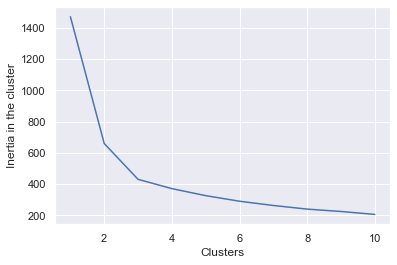

In [80]:
plt.plot(range(1,11), wss)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

In [82]:
k_means_4 = KMeans(n_clusters = 4)
k_means_4.fit(df_scaled)
labels_4 = k_means_4.labels_

In [84]:
df["Clus_kmeans"] = labels_4
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters1,Clus_kmeans
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,0
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,1,1
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,0
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,1,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,0


In [85]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [86]:
silhouette_score(df_scaled,labels_4)

0.32783548276481184

In [87]:
sil_width = silhouette_samples(df_scaled,labels_4)

In [88]:
df["sil_width"] = sil_width
df.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters1,Clus_kmeans,sil_width
0,19.94,16.92,0.875200,6.675,3.763,3.252000,6.550,1,0,0.444635
1,15.99,14.89,0.906400,5.363,3.582,3.336000,5.144,1,1,0.049665
2,18.95,16.42,0.882900,6.248,3.755,3.368000,6.148,1,0,0.442409
3,10.83,12.96,0.810588,5.278,2.641,5.182000,5.185,1,2,0.535517
4,17.99,15.86,0.899200,5.890,3.694,2.068000,5.837,1,0,0.082111
5,12.70,13.41,0.887400,5.183,3.091,8.079625,5.000,1,2,0.227757
6,12.02,13.33,0.850300,5.350,2.810,4.271000,5.308,1,2,0.473755
7,13.74,14.05,0.874400,5.482,3.114,2.932000,4.825,1,1,0.425667
8,18.17,16.26,0.863700,6.271,3.512,2.853000,6.273,1,0,0.191999
9,11.23,12.88,0.851100,5.140,2.795,4.325000,5.003,1,2,0.511993


In [89]:
silhouette_samples(df_scaled,labels_4).min()

-0.05493173343527373

In [99]:
from sklearn import metrics

In [100]:
scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(df_scaled)
    scores.append(metrics.silhouette_score(df_scaled, km.labels_))
    
scores

[0.46560100442748986,
 0.4008059221522216,
 0.32943733699973826,
 0.28331581604237704,
 0.29008748137211443,
 0.27924385297493454,
 0.2638089896766218,
 0.2583926120522323,
 0.26637561394383974]

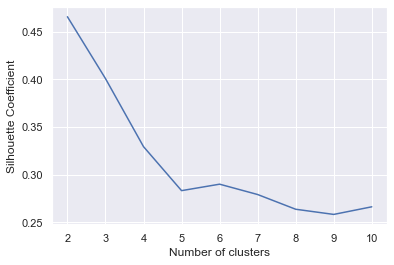

In [101]:
plt.plot(k_range,scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [103]:
df.to_csv('km_Problem_1_Clustering.csv')

In [104]:
kmeans1_df=df_scaled

In [125]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df_scaled)
k_means.inertia_
labels = k_means.labels_

In [126]:
silhouette_score(df_scaled,labels,random_state=123)

0.4008059221522216

**Cluster evaluation for 3 clusters**

In [127]:
silhouette_score(df_scaled,labels) #more positive the silhoutte score, better the result is.

0.4008059221522216

In [129]:
df["Clus_kmeans3"] = labels
df.head()

,Unnamed: 0,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters1,Clus_kmeans,sil_width,Clus_kmeans4,Clus_kmeans3
0,0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,0,0.444635,0,0
1,1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,1,1,0.049665,2,2
2,2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,0,0.442409,0,0
3,3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,1,2,0.535517,1,1
4,4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,0,0.082111,0,0


**Q1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.**

In [111]:
df.Clus_kmeans4.value_counts().sort_index()

0    65
1    48
2    67
3    30
Name: Clus_kmeans4, dtype: int64

In [130]:
clust_profile=df.drop(['spending'],axis=1)
clust_profile=clust_profile.groupby('Clus_kmeans3').mean()
clust_profile['freq']=df.Clus_kmeans4.value_counts().sort_index()
clust_profile

,Unnamed: 0,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters1,Clus_kmeans,sil_width,Clus_kmeans4,freq
Clus_kmeans3,,,,,,,,,,,,
0,100.358209,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,1.0,0.805970,0.323322,0,67
1,93.013889,13.247778,0.848330,5.231750,2.849542,4.733892,5.101722,1.0,1.888889,0.388789,1,72
2,120.056338,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,1.0,1.338028,0.270283,2,71


In [131]:
clust_profile

,Unnamed: 0,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters1,Clus_kmeans,sil_width,Clus_kmeans4,freq
Clus_kmeans3,,,,,,,,,,,,
0,100.358209,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,1.0,0.805970,0.323322,0,67
1,93.013889,13.247778,0.848330,5.231750,2.849542,4.733892,5.101722,1.0,1.888889,0.388789,1,72
2,120.056338,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,1.0,1.338028,0.270283,2,71


- Cluser 0: High spending group with high probability of full payment
- Cluster 1: Medium spending group with high probability of full payment
- Cluster 2: High spending group with low probability of full payment

**Some Recommendations on the promotional strategies for different clusters:**

The promotional recommendations will be different for all three categories of customers as with the current trends of marketing, personalized and experience based marketing promotional recommendations will be more accepted by the customers.

High spending group:
- Customers of this group are the most loyal and elite customers, who are always on top of the promotional list, as the rate of conversion of the offers are the highest with them.
- Based on the activities such as highest max_spent_in_single_shopping is on top for this group, they can be offered complimentary experiences such as free pre-redeemed tickets of the shows, movies, short tours or fine dine experiences.
- In terms of increasing the spending on single time they can be provided with the offers from the luxury brands or short discounts on the luxury shopping websites such as AJIO-Luxury, Tata CLiQ Luxury (Most preferred Indian luxury websites). These offers will help in customer retention and increase in the spending.

Medium spending group:
- These customers are the loyal most and hot prospects to be converted into max_spent_in_single_shopping tier.
- These folks would widely accept and act on personalized offers from the airlines, tour experiences, dine experiences and other shopping offers. One of the major points would be rewards on these experiences as membership offers.
- To look at the long run the customers of this segment would also prefer personalized discounts on second time shopping, this would make them shop again.
- Rewards on the repayments and using the reward points on shopping will be preferred by these customers, however these would require more brand partnerships to get executed.

High spending group with low probability of full payment:
- First service to this category folks would be Low interest EMI offers, because after bulk shopping they are not able to pay full bill.  This offer will encourage them to easily convert high amounts into EMIs and their whole amount would not be blocked by the bank. This would lead to more one time spending.
- Rewards points in the wallet post payment can be converted into cash or used on e-commerce websites for shopping.
- Regular and upfront payment reminders would also help in having them keep using the services

